In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [95]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [119]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/fruit-dataset/fruit-dataset/train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5393 images belonging to 6 classes.


In [120]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Dataset/fruit-dataset/fruit-dataset/test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [122]:
model=Sequential()

In [123]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [124]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [125]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [126]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [127]:
1238/24

51.583333333333336

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
225/225 [==============================] - 1121s 5s/step - loss: 0.9793 - accuracy: 0.7894 - val_loss: 0.2668 - val_accuracy: 0.9081
Epoch 2/10
225/225 [==============================] - 172s 762ms/step - loss: 0.2471 - accuracy: 0.9156 - val_loss: 0.1873 - val_accuracy: 0.9365
Epoch 3/10
225/225 [==============================] - 167s 744ms/step - loss: 0.2002 - accuracy: 0.9299 - val_loss: 0.2329 - val_accuracy: 0.9217
Epoch 4/10
225/225 [==============================] - 169s 750ms/step - loss: 0.1448 - accuracy: 0.9462 - val_loss: 0.1871 - val_accuracy: 0.9448
Epoch 5/10
225/225 [==============================] - 173s 768ms/step - loss: 0.1256 - accuracy: 0.9570 - val_loss: 0.2469 - val_accuracy: 0.9199
Epoch 6/10
225/225 [==============================] - 174s 772ms/step - loss: 0.1346 - accuracy: 0.9570 - val_loss: 0.1130 - val_accuracy: 0.9614
Epoch 7/10
225/225 [==============================] - 173s 771ms/step - loss: 0.1263 - accuracy: 0.9590 - val_loss: 0.1862 - v

In [139]:
model.save('fruitdata.h5')

In [140]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [142]:
model=load_model('fruitdata.h5')

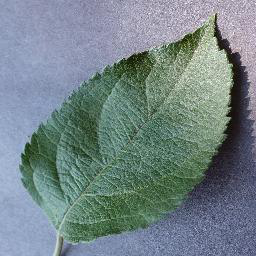

In [143]:
img=image.load_img(r"/content/0bb2ddc5-d1f4-4fc2-be6b-6b63c60790df___RS_HL 7550.JPG")
img

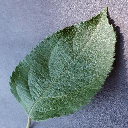

In [144]:
img=image.load_img(r"/content/0bb2ddc5-d1f4-4fc2-be6b-6b63c60790df___RS_HL 7550.JPG",target_size=(128,128))
img

In [145]:
x=image.img_to_array(img)
x

array([[[150., 161., 189.],
        [145., 156., 184.],
        [138., 149., 177.],
        ...,
        [228., 220., 235.],
        [139., 131., 146.],
        [201., 193., 208.]],

       [[145., 156., 184.],
        [150., 161., 189.],
        [140., 151., 179.],
        ...,
        [195., 187., 202.],
        [171., 163., 178.],
        [255., 247., 255.]],

       [[141., 152., 180.],
        [137., 148., 176.],
        [140., 151., 179.],
        ...,
        [150., 142., 157.],
        [178., 170., 185.],
        [164., 156., 171.]],

       ...,

       [[157., 172., 203.],
        [155., 170., 201.],
        [148., 163., 194.],
        ...,
        [127., 133., 165.],
        [141., 147., 179.],
        [108., 114., 146.]],

       [[161., 176., 207.],
        [162., 177., 208.],
        [159., 174., 205.],
        ...,
        [ 67.,  73., 105.],
        [ 95., 101., 133.],
        [ 86.,  92., 124.]],

       [[153., 168., 199.],
        [159., 174., 205.],
        [163., 1

In [146]:
x=np.expand_dims(x,axis=0)
x

array([[[[150., 161., 189.],
         [145., 156., 184.],
         [138., 149., 177.],
         ...,
         [228., 220., 235.],
         [139., 131., 146.],
         [201., 193., 208.]],

        [[145., 156., 184.],
         [150., 161., 189.],
         [140., 151., 179.],
         ...,
         [195., 187., 202.],
         [171., 163., 178.],
         [255., 247., 255.]],

        [[141., 152., 180.],
         [137., 148., 176.],
         [140., 151., 179.],
         ...,
         [150., 142., 157.],
         [178., 170., 185.],
         [164., 156., 171.]],

        ...,

        [[157., 172., 203.],
         [155., 170., 201.],
         [148., 163., 194.],
         ...,
         [127., 133., 165.],
         [141., 147., 179.],
         [108., 114., 146.]],

        [[161., 176., 207.],
         [162., 177., 208.],
         [159., 174., 205.],
         ...,
         [ 67.,  73., 105.],
         [ 95., 101., 133.],
         [ 86.,  92., 124.]],

        [[153., 168., 199.],
       

In [147]:
x

array([[[[150., 161., 189.],
         [145., 156., 184.],
         [138., 149., 177.],
         ...,
         [228., 220., 235.],
         [139., 131., 146.],
         [201., 193., 208.]],

        [[145., 156., 184.],
         [150., 161., 189.],
         [140., 151., 179.],
         ...,
         [195., 187., 202.],
         [171., 163., 178.],
         [255., 247., 255.]],

        [[141., 152., 180.],
         [137., 148., 176.],
         [140., 151., 179.],
         ...,
         [150., 142., 157.],
         [178., 170., 185.],
         [164., 156., 171.]],

        ...,

        [[157., 172., 203.],
         [155., 170., 201.],
         [148., 163., 194.],
         ...,
         [127., 133., 165.],
         [141., 147., 179.],
         [108., 114., 146.]],

        [[161., 176., 207.],
         [162., 177., 208.],
         [159., 174., 205.],
         ...,
         [ 67.,  73., 105.],
         [ 95., 101., 133.],
         [ 86.,  92., 124.]],

        [[153., 168., 199.],
       

In [148]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 97ms/step


In [149]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [150]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [151]:
index[y[0]]

'Corn_(maize)___healthy'

In [152]:
img=image.load_img(r"/content/drive/MyDrive/Dataset/fruit-dataset/fruit-dataset/test/Apple___healthy/011d02f3-5c3c-4484-a384-b1a0a0dbdec1___RS_HL 7544.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]


1/1 [==============================] - 0s 39ms/step


'Corn_(maize)___healthy'